<a href="https://colab.research.google.com/github/Aristidescasal/Labo4/blob/main/Scattering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema 11 Guía 3: Experimento en el acelerador ciclotrón de CNEA

In [1]:
!pip install quantities # Ejecutar
import quantities as pq  # paquete con unidades y constantes físicas
import numpy as np
#import inspect

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 3.3 MB/s eta 0:00:00


In [2]:
print(pq.e)  # algunas pruebas
print(pq.epsilon_0)
print(pq.MeV)  # Mega electronVolt
print(pq.A)
NAvogadro=6.022*10**23  #Numero de Avogadro mol**(-1)

1 e (elementary_charge)
1 epsilon_0 (electric_constant)
1 MeV
1 A (ampere)


## Enunciado:

En el ciclotrón de la CNEA se aceleran partículas $\alpha$ a
una energía de 55 MeV. Se obtiene un haz de 0.5 nanoamperes de
intensidad que se hace incidir sobre un blanco de oro de 0.5
mg/cm$^2$. A 20 cm del blanco y formando un ángulo de 5 grados con
la dirección del haz incidente se coloca un detector de estado
sólido, que cuenta todas las partículas que pasan por un orificio
circular de 1 mm de diámetro. ¿Cuántas partículas se espera contar
por segundo por efecto de la dispersión coulombiana? Para un
núcleo formado por $A$ nucleones, su radio viene dado
aproximadamente por $R\sim 1.2 A^{1/3}$ fermi. ¿Podrán observarse
entonces efectos nucleares? ¿Cómo se manifestarían dichos efectos?
Considere los siguientes datos: 1 MeV = $1.60\times 10^{-6}$
ergios; 1 fermi= $10^{-13}$ cm; oro: Au$^{197}_{79}$; part
$\alpha$: He$^4_2$; masa de los nucleones: $1.67\times 10^{-24}$
g; $N_a = $  número de Avogadro $= 6.02\times
10^{23}$; $e=1.6\times 10^{-19}$ coulombs; $e^2=1.43\times
10^{-13}$ MeV cm.


Este problema es interesante pues nos presenta un posible experimento de scattering de Rutherford.
 Las partículas $\alpha$ impactan sobre una lámina de oro. Asumimos un condición de **simple dispersión**: cada partícula $\alpha$ pasa cerca de uno solo de los átomos de la lámina delgada.

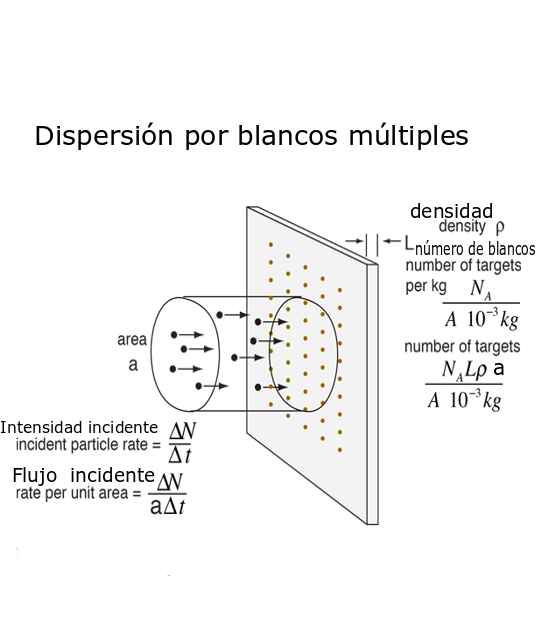

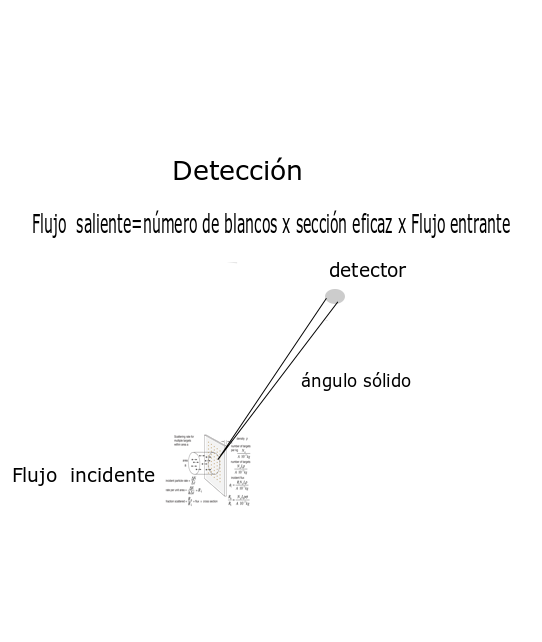

# Configuración del haz

El haz está caracterizado por:
1. los iones del haz: partículas $\alpha$, con número atómico $Z_\alpha=2$, número de masa $A_\alpha=4$, su Energía es  55 MeV (millones de electrón Voltios).
2. la corriente $i$ y por eventualmente la sección $A$ (no es dato, pero se cancela luego en las expresiones).
Con esos datos uno busca el número de partículas incidente por unidad de tiempo y area: $N_i$.

Se trabaja en el sistema de laboratorio que en este caso es muy cercano al sistema de centro de masa,
 pues la masa del oro es mucho mas grande que la de las partículas $\alpha$.


In [3]:
Energia=55*pq.MeV
Energia.units=pq.joule;print('Energía=',Energia)
i=pq.Quantity(0.5*10**(-9),'A')
Z_alpha=2

Area=1*pq.m**2 #  elegimos Area=1 m^2, pero no depende de este valor pues se cancela
N_i=i/(Z_alpha*pq.e*Area); print('N_i=',N_i.simplified)

Energía= 8.811970915000001e-12 J
N_i= 1560377411.7801044 1/(m**2*s)


# Configuración del blanco

* El blanco es una lámina delgada de oro. La dispersión se dá por interacción con el núcleo atómico del oro, con carga $Z_{Au}=79$ veces el módulo de la la carga del electrón, número de masa $A_{Au}=197$.
* El blanco posee un *espesor*: $Th=\rho a = 0.5 mg/cm^2$, donde
$\rho$ es la densidad y $a$ es la profundidad de la lámina blanco.
* **Asumimos condición de simple dispersión**: las partículas son dispersadas solamente por el núcleo más cercano que encuentran en el camino.
* Se busca el número de dispersores $N_d=\frac{\rho a Area}{M_{Au}}$  atravesados por el haz ($M_{Au}$ es la masa de un átomo de oro):

In [4]:
Th=0.5*pq.mg/pq.cm**2;print('Espesor del blanco=',Th)
Z_Au=79  #Número Atómico del oro *
A_Au=197 #Masa Atómica del oro

M_Au=A_Au/NAvogadro*pq.g;print('Masa del átomo de oro',M_Au)
N_d= Th* Area/M_Au;print('Número de dispersores=',N_d.simplified)

Espesor del blanco= 0.5 mg/cm**2
Masa del átomo de oro 3.271338425772169e-22 g
Número de dispersores= 1.5284263959390862e+22 dimensionless


# Detector

* El detector posee una área de sección $a$ y está ubicado a una distancia $d$ de 20 cm.
* A esta distancia **todas las partículas dispersadas con el mismo ángulo por cualquier núcleo de oro son detectadas** (el área de impacto es muy chica).
* El ángulo de detección es $\theta=5$ grados.

In [5]:
a=pq.Quantity(np.pi*(10**(-3)/2)**2,'m**2')
print('area a=',a)
d=pq.Quantity(20*10**(-2),'m')
theta=5*np.pi/180.;print('theta=',theta)
delta_Omega=a/d**2;print('delta_Omega=',delta_Omega)

area a= 7.853981633974482e-07 m**2
theta= 0.08726646259971647
delta_Omega= 1.9634954084936203e-05 dimensionless


# Sección eficaz de Rutherford

Se usa la sección eficaz de Rutherford que está dada por la interacción Coulombiana de la partícula $\alpha$ con el  núcleo de Au.

In [6]:
Q1=Z_alpha*pq.e; print('Carga partícula alpha=',Q1)
Q2=Z_Au*pq.e; print('Carga núcleo de oro=',Q2)

DSigmaDOmegaRutherford=( (Q1*Q2/(4*np.pi*pq.epsilon_0)) / (4*Energia*
     np.sin(theta/2)**2 ))**2
print('Sección eficaz diferencial=',DSigmaDOmegaRutherford.simplified)

Carga partícula alpha= 2.0 e
Carga núcleo de oro= 79.0 e
Sección eficaz diferencial= 2.95429637769258e-25 m**2


# Cálculo de n
El número de partículas detectadas por unidad de tiempo es n, y se determina a partir del número de dispersores, la sección eficaz de Rutherford y el ángulo sólido substendido por el detector  $\Delta\Omega$

In [7]:
n=DSigmaDOmegaRutherford*N_i*N_d*delta_Omega
print('cantidad de partículas detectadas/s=',n.simplified)

cantidad de partículas detectadas/s= 138.3433016415026 1/s


# ¿Es mucho o es poco?
